
1) [0.100000; 0.200000]
Saknis: 0.14479906071536203

2) [2.900000; 3.000000]
Saknis: 2.99679359288042

0.144777222006
2.996793593106
Minimalus N: 23

TE: (x - 2)**23*(-134217728*sin(8)/9861761756471625 - 29*cos(2)/25852016738884976640000) + (x - 2)**22*(33554432*cos(8)/428772250281375 - 29*sin(2)/1124000727777607680000) + (x - 2)**21*(29*cos(2)/51090942171709440000 + 16777216*sin(8)/38979295480125) + (x - 2)**20*(29*sin(2)/2432902008176640000 - 4194304*cos(8)/1856156927625) + (x - 2)**19*(-4194304*sin(8)/371231385525 - 29*cos(2)/121645100408832000) + (x - 2)**18*(1048576*cos(8)/19538493975 - 29*sin(2)/6402373705728000) + (x - 2)**17*(29*cos(2)/355687428096000 + 524288*sin(8)/2170943775) + (x - 2)**16*(29*sin(2)/20922789888000 - 131072*cos(8)/127702575) + (x - 2)**15*(-524288*sin(8)/127702575 - 29*cos(2)/1307674368000) + (x - 2)**14*(131072*cos(8)/8513505 - 29*sin(2)/87178291200) + (x - 2)**13*(29*cos(2)/6227020800 + 65536*sin(8)/1216215) + (x - 2)**12*(29*sin(2)/479001600 - 16384*cos(

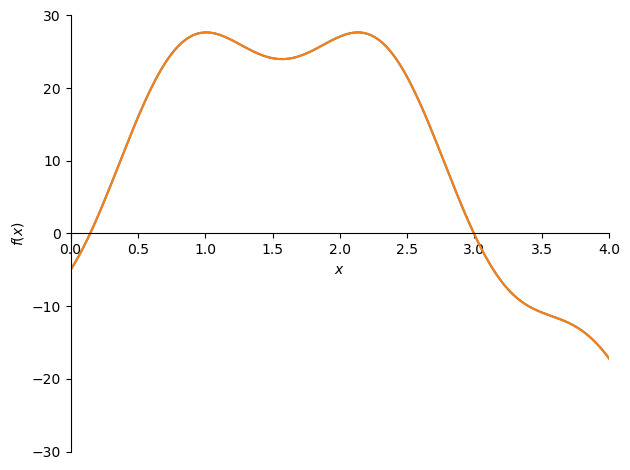

In [1]:
import numpy as np
import math
import sympy
from sympy import plot

def func(x):
    return 29*np.sin(x) - 5*np.cos(4*x)

def dfunc(x):
    return 29*np.cos(x) + 20*np.sin(4*x)

#intervalas, zingsnis, max iteraciju skaicius, tikslumas
start = 0
end = 4
h = 0.1
max_iter = 1000
accuracy = 1e-9

#saknu intervalai
intervalai = []
xleft = start
yleft = func(xleft)

#randami saknu intervalai
while xleft < end - 1e-12:
    xright = min(xleft + h, end)
    yright = func(xright)

    if yleft * yright < 0:
        intervalai.append((xleft, xright))

    xleft, yleft = xright, yright

niutono = []
#randamos saknys niutono liestiniu metodu
if intervalai:
    for i, (a, b) in enumerate(intervalai, 1):
        print(f"\n{i}) [{a:.6f}; {b:.6f}]")
        a0, b0 = a, b

        steps = 0
        x = a0
        while steps < max_iter:
            fx = func(x)
        
            if abs(fx) <= accuracy:
                break
            
            dfx = dfunc(x)
            
            if abs(dfx) < 1e-14:
                break
            
            xnew = x - fx / dfx

            if (xnew < a0 or xnew > b0) or (abs(func(xnew)) > abs(fx)):
                xnew = 0.5 * (a0 + b0)

            if abs(xnew - x) <= accuracy:
                x = xnew
                break

            x = xnew
            steps += 1

        niutono.append(x)
        print(f"Saknis: {x}")

#simboliniai kintamieji
x, f, fp, df = sympy.symbols(('x', 'f', 'fp', 'df'))
#funkcija
fa = 29 * sympy.sin(x) - 5 * sympy.cos(4 * x)

#paimamas intervalo vidurys
#leistina paklaida lyginant saknis
#nurodomas maximalus TE eilutes nariu skaicius
x0 = 2
compare = 1e-4
maxN = 30

#isrusiuotos niutono saknys
niutono_sorted = sorted(niutono)

bestN = None
bestfp = None
bestte_roots = None

#einama per laipsnius ir ieskoma pirmo kurio saknu paklaidos telpa i leistina intervala
for N in range (1, maxN + 1):
    #dabartine isvestine - startuoja nuo pacios funkcijos
    fN = fa
    #teiloro eilutes konstantinis narys
    fp = fN.subs(x, x0)

    #kiekvienam zingsnyje pereinama prie kitos isvestines
    for i in range(1, N + 1):
        fN = fN.diff(x)
        #pridedamas teiloro narys
        fp = fp + fN.subs(x, x0) / math.factorial(i) * (x - x0)**i

    #pavertimas i polinomo objekta pagal x
    P = sympy.Poly(fp, x)
    #grazina koeficientus
    kf = np.array(P.all_coeffs(), dtype=float)

    #randa visas polinomo saknis (realias ir kompleksines)
    saknys = np.roots(kf)
    #atfiltruoja kad liktu tik realios saknys
    saknys = saknys[np.isreal(saknys)]
    saknys = np.real(saknys)
    #paliekamos tik tos saknys kurios patenka i norima intervala
    saknys = [val for val in saknys if start - 1e-12 <= val <= end + 1e-12]
    #isrikiuojamos saknys
    saknys_sorted = sorted(saknys)

    #netinka N jeigu nesutampa rastu saknu skaicius su rastu saknu skaiciumi is niutono metodo
    if (len(saknys_sorted) != len(niutono_sorted)):
        continue

    #sudeda saknis poromis ir apskaiciuoja skirtuma tarp saknu poru
    diffs = [abs(a - b) for a, b in zip(saknys_sorted, niutono_sorted)]

    #jei visi skirtumai tarp saknu poru patenka i paklaidos intervala tada issaugome N ir uzbaigiame cikla
    if all(d <= compare for d in diffs):
        bestN = N
        bestfp = fp
        bestte_roots = saknys_sorted
        break

print()
for r in bestte_roots:
    print(f"{float(r):.12f}")
print(f"Minimalus N: {bestN}")

print()
print(f"TE: {fp}")

p = plot(fa, fp, show = False)
p.ylim = (-30, 30)
p.xlim = (0, 4)
p.show()

#TE yra būdas aproksimuoti sudėtingą funkciją paprastesne (polinomu), naudodami tos funkcijos išvestines viename taške

#Pasižiūrime į vieną tašką kelyje
#Pamatuojame: kur jis yra, koks jo nuolydis (ar kyla, ar leidžiasi), kiek jis pasilenkęs
#Pagal šią informaciją pasidarome „paprastesnį kelią“ (tiesę, kreivę ar parabolę), kuris šalia to taško labai panašus į tikrą kelią